<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/CrossValidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Train-Test Split versus k-Fold Cross-Validation**

The main task of learning algorithms is to be able to generalize to unseen data. Since we cannot immediately check the model performance on new, incoming data (because we do not know the true values of the target variable yet), it is necessary to sacrifice a small portion of the data to check the quality of the model on it.These techniques are used in machine learning to evaluate the performance of a model and prevent overfitting.This is often done in one of two ways:

Train-test split and k-fold cross-validation


Train-test split involves splitting the dataset into two parts, a training set and a testing set. We reserve a fraction of the data (typically from 20% to 40%) for test set, train the model on the remaining data (60-80% of the original set), and compute performance metrics for the model (e.g accuracy) on the test data.The advantage of this technique is that it is simple and computationally efficient. However, it may produce high variance in the evaluation metric due to the randomness of the split.



Cross-validation is when the dataset is randomly split up into ‘k’ groups. One of the groups is used as the test set and the rest are used as the training set. The model is trained on the training set and scored on the test set. Then the process is repeated until each unique group has been used as the test set. We obtain K model quality assessments that are usually averaged to give an overall average quality of classification/regression.



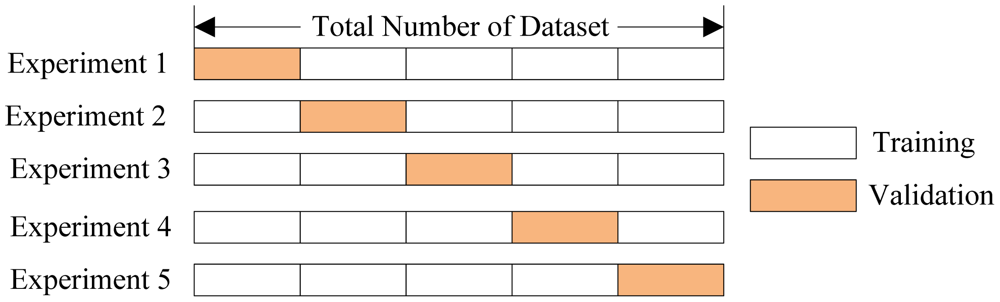





Cross-validation and train-test split are both techniques used in machine learning to assess the performance of models and to prevent overfitting. Each method has its advantages and disadvantages, but cross-validation is often preferred for several reasons:

**Better Utilization of Data:**
Cross-validation allows for better utilization of the available data. In k-fold cross-validation, the dataset is divided into k subsets, and the model is trained and tested k times. Each time, a different subset is used as the test set and the remaining data is used for training. This ensures that each data point is used for both training and validation, leading to a more comprehensive assessment of the model's performance.

**Reduced Variance:** Cross-validation provides a more reliable estimate of the model's performance compared to a single train-test split. Since the model is evaluated multiple times on different subsets of the data, the variance in the performance estimate is reduced. This helps to produce a more stable and generalizable evaluation of the model.

**Mitigating Overfitting:** Cross-validation helps to mitigate the risk of overfitting by providing multiple evaluations of the model's performance on different subsets of the data. This allows for a more accurate assessment of how well the model generalizes to unseen data.

**Parameter Tuning:** Cross-validation is often used in combination with techniques such as grid search or random search for hyperparameter tuning. By performing cross-validation on different sets of hyperparameters, it is possible to select the best combination that optimizes the model's performance.

**Detection of Data Imbalance:** Cross-validation can help in detecting issues such as data imbalance more effectively. Since the dataset is divided into multiple subsets during cross-validation, each fold is more likely to have a representative distribution of classes, which helps in evaluating the model's performance across different class distributions.

However, train-test split also has its advantages, particularly in terms of simplicity and computational efficiency. It is often used for quick model evaluation or when computational resources are limited. Despite its simplicity, it may not provide as robust an estimate of the model's performance as cross-validation, especially with smaller datasets.

In [41]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
from matplotlib import pyplot as plt
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"
df = pd.read_csv(DATA_PATH + "telecom_churn.csv")

df["International plan"] = pd.factorize(df["International plan"])[0]
df["Voice mail plan"] = pd.factorize(df["Voice mail plan"])[0]
df["Churn"] = df["Churn"].astype("int")
states = df["State"]
y = df["Churn"]
X=df.drop(["State", "Churn"], axis=1)


In [42]:
X

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,0,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,415,0,1,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,510,0,1,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,510,1,1,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


Decision Tree

In [43]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.3, random_state=17
)

tree = DecisionTreeClassifier(random_state=17)

tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=17)

In [44]:
from sklearn.metrics import accuracy_score

tree_pred = tree.predict(X_test)
accuracy_score(y_test, tree_pred)

0.92

In [45]:
score=cross_val_score(tree,X, y, cv= 5, scoring="accuracy")
print(score)
score.mean()

[0.90854573 0.91604198 0.93703148 0.92042042 0.91441441]


0.9192908050479265

Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier( random_state=17)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=17)

In [47]:
from sklearn.metrics import accuracy_score

forest_pred = forest.predict(X_test)
accuracy_score(y_test, forest_pred)

0.95

In [48]:
score=cross_val_score(forest,X, y, cv= 5, scoring="accuracy")
print(score)
score.mean()

[0.94752624 0.94302849 0.96251874 0.95195195 0.95945946]


0.9528969749359556

Decision Tree Parameter Tuning on Train Data Using Cross Validation

In [49]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {"max_depth": range(6, 10), "max_features": range(5, 10)}

tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=17), n_jobs=-1,
             param_grid={'max_depth': range(6, 10),
                         'max_features': range(5, 10)},
             verbose=True)

In [57]:
print('Best parameters:',tree_grid.best_params_)
print('Best score:',tree_grid.best_score_)
print('Accuracy :',accuracy_score(y_test, tree_grid.predict(X_test)))

Best parameters: {'max_depth': 7, 'max_features': 8}
Best score: 0.9262841073053277
Accuracy : 0.915


Random Forest Parameter Tuning on Train Data Using Cross Validation

In [58]:
forest_params = {"max_depth": range(6, 10), "max_features": range(5, 10)}

forest_grid = GridSearchCV(forest, forest_params, cv=5, n_jobs=-1, verbose=True)

forest_grid.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=17), n_jobs=-1,
             param_grid={'max_depth': range(6, 10),
                         'max_features': range(5, 10)},
             verbose=True)

In [56]:
print('Best parameters:',forest_grid.best_params_)
print('Best score:',forest_grid.best_score_)
print('Accuracy :',accuracy_score(y_test, forest_grid.predict(X_test)))

Best parameters: {'max_depth': 9, 'max_features': 6}
Best score: 0.9511372931045574
Accuracy : 0.953
